In [ ]:
# Loading data into the colab environment

from google.colab import files
uploaded = files.upload()

Saving This is The Weeknd.csv to This is The Weeknd.csv


In [ ]:
#Importing methods to be used later on

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

In [ ]:
# Part 1 Data Acquisition
dataframes = []
# Read data from a CSV file into a data frame
# Put name of file you uploaded in brackets if working in Google Colab


dfa = pd.read_csv(r'ConsolidatedCountryData_Australia.csv')
dfa = dfa.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('Australia', dfa))
dfb = pd.read_csv(r'ConsolidatedCountryData_Brazil.csv')
dfb = dfb.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('Brazil', dfb))
dfg = pd.read_csv(r'ConsolidatedCountryData_Germany.csv')
dfg = dfg.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('Germany',dfg))
dfi = pd.read_csv(r'ConsolidatedCountryData_India.csv')
dfi = dfi.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('India',dfi))
dfj = pd.read_csv(r'ConsolidatedCountryData_Japan.csv')
dfj = dfj.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('Japan',dfj))
dfp = pd.read_csv(r'ConsolidatedCountryData_Philippiness.csv')
dfp = dfp.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('Philippiness',dfp))
dfs = pd.read_csv(r'ConsolidatedCountryData_SouthAfrica.csv')
dfs = dfs.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('South Africa',dfs))
dfUK = pd.read_csv(r'ConsolidatedCountryData_UK.csv')
dfUK = dfUK.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('UK',dfUK))
dfUS = pd.read_csv(r'ConsolidatedCountryData_US.csv')
dfUS = dfUS.drop(['Artist','Song Name','key','time_signature'],axis = 1)
dataframes.append(('US',dfUS))
df_additional = pd.read_csv(r'data1.csv')

# Display the first ten rows of each data frame to examine if it is an individual-level data set
for df in dataframes:
  print(df[0])
  print(df[1].head(10))

Australia
   danceability  energy  loudness  mode  ...  liveness  valence    tempo  Approved
0         0.700   0.722    -3.558     0  ...    0.2720    0.756   90.989         1
1         0.736   0.802    -4.759     1  ...    0.0940    0.675  144.005         1
2         0.834   0.663    -6.143     1  ...    0.3720    0.774  121.876         1
3         0.637   0.690    -4.057     0  ...    0.1240    0.457  129.857         1
4         0.746   0.765    -4.410     0  ...    0.0936    0.737  114.044         1
5         0.935   0.454    -7.509     1  ...    0.0824    0.357  133.073         1
6         0.755   0.578    -8.932     0  ...    0.2500    0.581   94.148         1
7         0.357   0.425    -7.301     1  ...    0.3220    0.270  102.078         1
8         0.746   0.690    -7.956     1  ...    0.1010    0.497   89.977         1
9         0.800   0.560    -4.818     0  ...    0.1340    0.450  163.071         1

[10 rows x 11 columns]
Brazil
   danceability  energy  loudness  mode  ...  

Australia
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


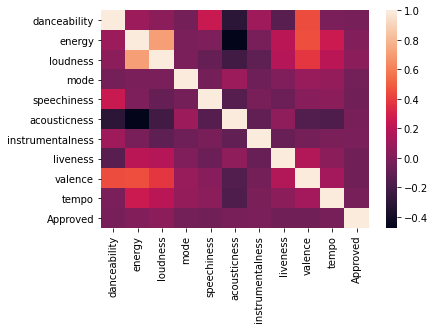

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[0][0])
df4heatmaps = dataframes[0][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Brazil
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


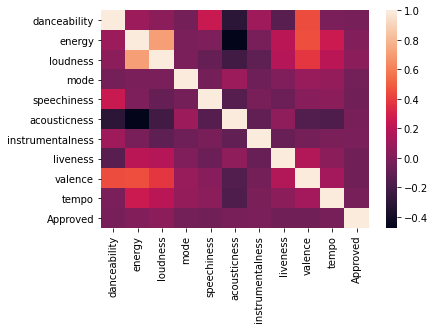

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[1][0])
df4heatmapsa = dataframes[1][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Germany
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


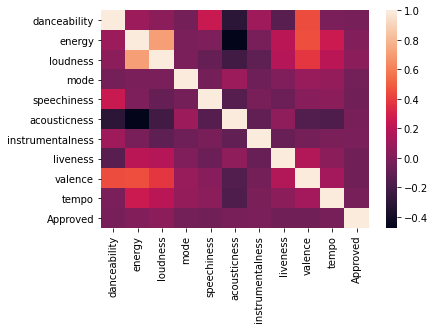

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[2][0])
df4heatmapsa = dataframes[2][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

India
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


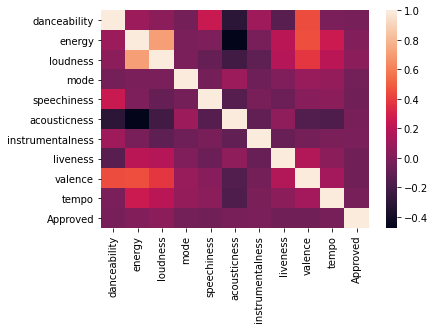

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[3][0])
df4heatmapsa = dataframes[3][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Japan
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


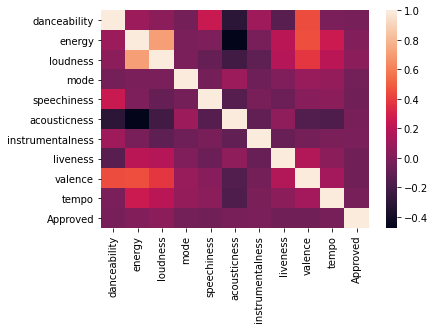

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[4][0])
df4heatmapsa = dataframes[4][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Philippiness
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


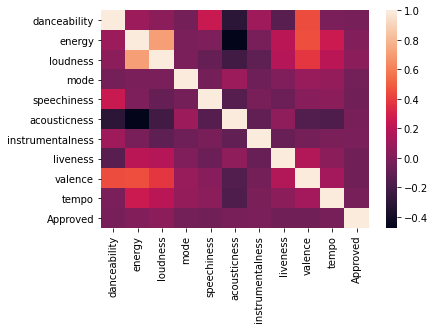

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[5][0])
df4heatmapsa = dataframes[5][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

South Africa
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


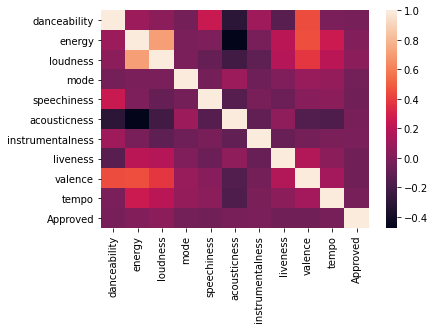

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[6][0])
df4heatmapsa = dataframes[6][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

UK
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


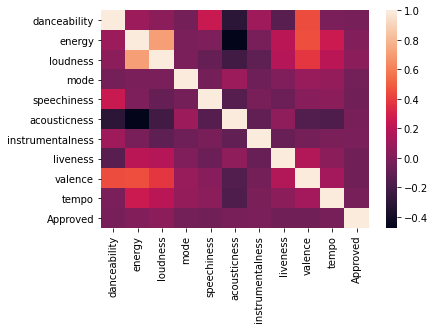

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[7][0])
df4heatmapsa = dataframes[7][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

US
                  danceability    energy  ...     tempo  Approved
danceability          1.000000  0.096058  ... -0.017697 -0.025200
energy                0.096058  1.000000  ...  0.262335  0.010268
loudness              0.040215  0.708432  ...  0.202566  0.049186
mode                 -0.032969 -0.017899  ...  0.078048 -0.037040
speechiness           0.252755 -0.002296  ...  0.045199 -0.045004
acousticness         -0.306292 -0.474107  ... -0.174055 -0.020159
instrumentalness      0.106791 -0.023057  ... -0.008430 -0.014087
liveness             -0.135675  0.202979  ...  0.047206 -0.048339
valence               0.447986  0.453621  ...  0.126731 -0.042734
tempo                -0.017697  0.262335  ...  1.000000 -0.025759
Approved             -0.025200  0.010268  ... -0.025759  1.000000

[11 rows x 11 columns]


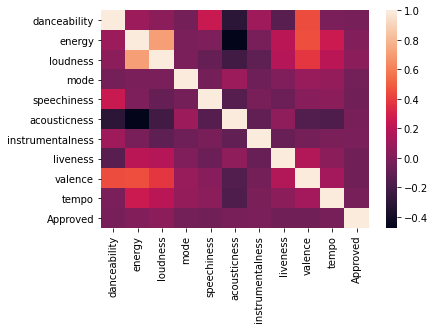

In [ ]:
# Placeholder variables: df4heatmaps
print(dataframes[8][0])
df4heatmapsa = dataframes[8][1]

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Australia
[0.09958355 0.09790672 0.11421845 0.02692053 0.10024918 0.11963222
 0.08843401 0.11028278 0.11706839 0.12570417]


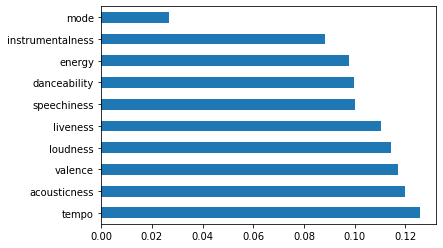

Brazil
[0.08755954 0.10445324 0.11383926 0.03575449 0.07025304 0.13565828
 0.03534076 0.20323082 0.12901062 0.08489996]


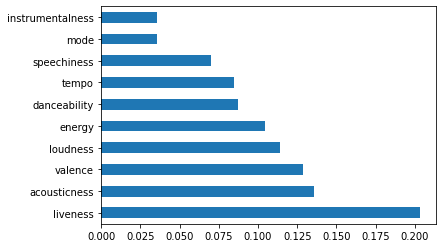

Germany
[0.12547424 0.09763218 0.10605476 0.02775292 0.15134958 0.09986809
 0.10646481 0.09117745 0.09776551 0.09646046]


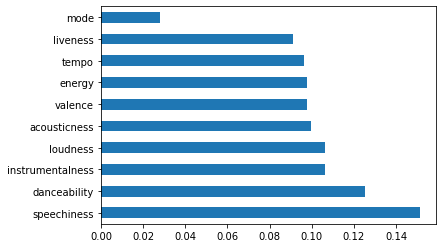

India
[0.1184131  0.11308379 0.10667333 0.0326465  0.10732803 0.11946829
 0.07323281 0.11956663 0.10780567 0.10178186]


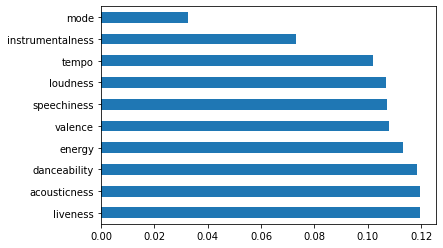

Japan
[0.13448676 0.12710033 0.1291462  0.03083906 0.09281096 0.12418851
 0.04288259 0.09350009 0.10200582 0.12303967]


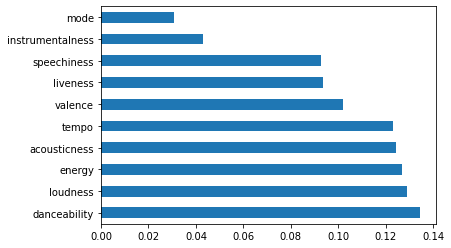

Philippiness
[0.09840176 0.14923441 0.12087373 0.03396591 0.09433584 0.10810067
 0.07175691 0.09907646 0.10564068 0.11861362]


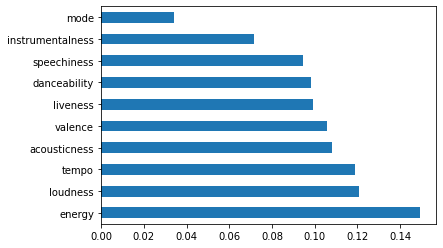

South Africa
[0.09712485 0.08868636 0.0946977  0.03212747 0.09736916 0.09628454
 0.17417106 0.13207747 0.08702605 0.10043533]


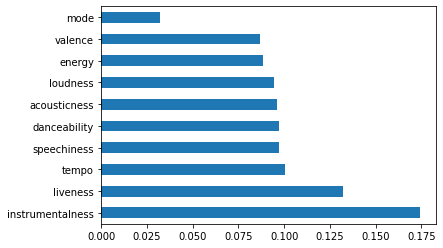

UK
[0.11114801 0.10545943 0.12205297 0.02357829 0.11122102 0.11089202
 0.07212733 0.11346916 0.10935    0.12070177]


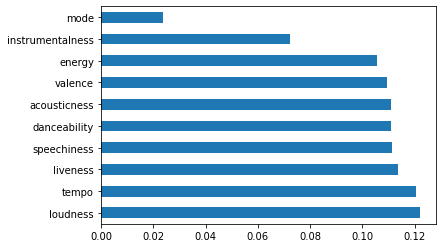

US
[0.10385708 0.11072136 0.10694381 0.04390032 0.10169483 0.08425354
 0.10655367 0.09898637 0.13121409 0.11187493]


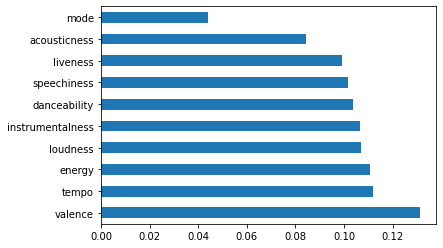

In [ ]:
#Feature Importance 
for df in dataframes:
  print(df[0])

  #X and Y 
  X = df[1].copy().drop(["Approved"], 1)
  Y = df[1]["Approved"]
  #Extra trees classifer for ranking prediction importance
  model = ExtraTreesClassifier()
  model.fit(X,Y)
  print(model.feature_importances_) 
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  plt.show()

In [ ]:
#Initial Dataframe to be packed with model results for all datasets. 
dff = pd.DataFrame([['kNN', 'AUC Score'], ['kNN', 'Accuracy Score'],
                    ['Logistic Regression', 'AUC Score'], ['Logistic Regression', 'Accuracy Score'],
                    ['Classification Tree', 'AUC Score'], ['Classification Tree', 'Accuracy Score'],
                    ['Neural Network', 'AUC Score'], ['Neural Network', 'Accuracy Score']],
                   columns=['Model', 'Values'])



df_multi_index = pd.MultiIndex.from_frame(dff)

df_results = pd.DataFrame(index=df_multi_index)

df_results.dropna()

df_results

Empty DataFrame
Columns: []
Index: [(kNN, AUC Score), (kNN, Accuracy Score), (Logistic Regression, AUC Score), (Logistic Regression, Accuracy Score), (Classification Tree, AUC Score), (Classification Tree, Accuracy Score), (Neural Network, AUC Score), (Neural Network, Accuracy Score)]

In [ ]:
for df in dataframes:
  # Part 4 Variable transformation

  #Categorical and Numerical list building
  df_sample1 = df[1].append(df_additional)
 
  # Separate all the variables into two lists for future column indexing
  # One for numerical, the other for categorical 
  cvar_list = ['mode','Approved']
  nvar_list = ['danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

  # Standardize the numerical variables 
  df_sample5 = df_sample1.copy()
  df_sample5[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

  # Set the datatype for the variables in the cvar_list to be categorical in Python
  # Set the datatype for the variables in the nvar_list to be numerical in Python 
  df_sample6 = df_sample5.copy()
  df_sample6[cvar_list] = df_sample5[cvar_list].astype('category')
  df_sample6[nvar_list] = df_sample5[nvar_list].astype('float64')

  # Convert the categorical variables into dummies (Step 1 of dummy coding)
  df_sample7 = df_sample6.copy()
  df_sample7 = pd.get_dummies(df_sample6, prefix_sep='_')

  # Remove the redundant dummies (Step 2 of dummy coding)
  # Placeholder variable: rdummies
  rdummies = ['Approved_0']
  df_sample8 = df_sample7.copy()
  df_sample8 = df_sample7.drop(columns=rdummies)

  # Part 5 Data Partiton

  # Placeholder variables: df4partition, testpart_size
  # test_size specifies the percentage for the test partition
  df4partition = df_sample8
  testpart_size = 0.2

  # random_state specifies the seed for random number generator. 
  # random_state = 1 unless otherwised noted
  df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

  #Prepping for Model testing
  # Separate the predictor values and the DV values into X and y respectively
  # Placeholder variable: DV
  DV = 'Approved_1'
  y = df_nontestData[DV]
  X = df_nontestData.drop(columns=[DV])

  # Report the performance over the test partition

  X_test = df_testData.drop(columns=DV)
  y_test = df_testData[DV]


  #Part 6 Model Testing Loop and dataframe building

  Series = []

  #kNN ##################################################################

  # First we build a kNN model with pre-specified k
  k = 5
  kfolds = 5

  clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

  model_object = clf

  #ATTENTION TO MATT OR OWA FROM OWA, HAD TO CHANGE THIS FROM 200 AS FUNCTION WOULDNT WORK
  max_k = 150

  param_grid = {'n_neighbors': list(range(1, max_k-1))}

  # Set n_jobs to be -1 to run  on all CPU cores.
  # The search criterion is to find the model that maximizes 
  # whatever the scoring function - for this case roc_auc - returns.

  gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
  gridsearch.fit(X,y)
  clf_bestkNN = gridsearch.best_estimator_

  # obtain the AUC of the k-NN model with k=5
  kNN_AUC = metrics.roc_auc_score(y_test, clf_bestkNN.predict_proba(X_test)[:, 1])
  Series.append(kNN_AUC)

  # Display the accuracy over the test partition
  kNN_Accuracy = clf_bestkNN.score(X_test, y_test)
  Series.append(kNN_Accuracy)

  #Logistic Regression ###########################################

  # Run Logistic regression with pre-specified penalty level (alpha)
  # Placeholder variable: alpha
  alpha = 10

  # The Logistic regression results are put into a model object clf
  clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

  # Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
  # i.e., the level that leads to the best model candidate
  # We search the optimal alpha within [min_alpha, max_alpha]
  min_alpha = 0.001
  max_alpha = 100

  # We further discretize the continuous alpha range [min_alpha, max_alpha] into n individual points of alpha
  # We train n model candidates each of which corresponds to one individual alpha point
  n_candidates = 1000

  # We store the list of individual alpha points into alpha_list
  alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

  # C_list is the element-wise inverse of alpha_list. It is required as one of the paramater values for LogisticRegressionCV
  C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

  # Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
  clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=1000, random_state=1, n_jobs=-1).fit(X,y)

  LReg_AUC = metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1])
  Series.append(LReg_AUC)

  LReg_Accuracy = clf_optimal.score(X_test, y_test)
  Series.append(LReg_Accuracy)

  #ClassificationTree ###################################

  # Run Classification tree with k-fold cross validation with k=5
  # Placeholder variable: kfolds

  # Here we specify within which range of depths we will search for the best pruned tree
  maximum_depth = 100
  minimum_depth = 1

  param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

  gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
  gridsearch.fit(X,y)
  clf_BPT = gridsearch.best_estimator_

  # X_test is the predictor values in the test partition
  X_test = df_testData.drop(columns=[DV])

  # Get the AUC of the best pruned tree model

  Tree_AUC = roc_auc_score(y_test, clf_BPT.predict_proba(X_test)[:,1])
  Series.append(Tree_AUC)

  Tree_Accuracy = clf_BPT.score(X_test, y_test)
  Series.append(Tree_Accuracy)

  #Neural Network ############################################################################

  # Build a neural network with pre-specified penalty level alpha 
  # and pre-specified number of nodes on the hidden layer hls 
  alpha = 0.1
  hls = 3

  # Increase max_iter from 2000 to 4000 if a warning msg shows that the model does not converge
  clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=hls, max_iter=2000, random_state=1).fit(X,y)

  # Run Neural Network with k-fold cross validation with k=5
  # Placeholder variable: kfolds
  kfolds = 5

  # Here we specify within which range of the number of nodes on the hidden layer we will search for the best network model
  min_hls = 1
  max_hls = 10

  # Here we specify within which range of penalty level we will search for the best network model
  min_alpha = 0.0001
  max_alpha = 10
  n_alpha = 10

  # Define the parameter grid for search

  param_grid = {'hidden_layer_sizes':np.arange(min_hls, max_hls), 'alpha': list(np.linspace(min_alpha, max_alpha, num=n_alpha))}

  # Set n_jobs to be -1 to run  on all CPU cores.
  # The search criterion is to find the model that maximizes 
  # whatever the scoring function - for this case roc_auc - returns.

  gridsearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
  gridsearch.fit(X,y)
  clf_NN = gridsearch.best_estimator_

  # Get the AUC of the best pruned tree model

  NN_AUC = roc_auc_score(y_test, clf_NN.predict_proba(X_test)[:,1])
  Series.append(NN_AUC)

  NN_Accuracy = clf_NN.score(X_test, y_test)
  Series.append(NN_Accuracy)

  df_results[df[0]] = Series

KeyError: ignored

In [ ]:
df_results

Australia    Brazil  ...        UK        US
Model               Values                               ...                    
kNN                 AUC Score        0.797951  0.880715  ...  0.812291  0.786127
                    Accuracy Score   0.940217  0.940217  ...  0.972826  0.940217
Logistic Regression AUC Score        0.766684  0.883605  ...  0.788827  0.846821
                    Accuracy Score   0.940217  0.951087  ...  0.972826  0.940217
Classification Tree AUC Score        0.763794  0.760116  ...  0.784916  0.725959
                    Accuracy Score   0.940217  0.929348  ...  0.972826  0.940217
Neural Network      AUC Score        0.780084  0.842354  ...  0.757542  0.857331
                    Accuracy Score   0.940217  0.945652  ...  0.972826  0.940217

[8 rows x 9 columns]